In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
folder = "/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset"
import os
import zipfile

folder = "/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset"

for filename in os.listdir(folder):
    if filename.endswith(".zip"):
        zip_path = os.path.join(folder, filename)

        extract_folder = os.path.join(folder, filename.replace(".zip", ""))
        os.makedirs(extract_folder, exist_ok=True)

        print("Extracting:", filename)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)

print("Done!")


Extracting: exams_part10.zip
Extracting: exams_part0.zip
Extracting: exams_part12.zip
Extracting: exams_part1.zip
Extracting: exams_part11.zip
Extracting: exams_part13.zip
Extracting: exams_part17.zip
Extracting: exams_part16.zip
Extracting: exams_part3.zip
Extracting: exams_part15.zip
Extracting: exams_part2.zip
Extracting: exams_part5.zip
Extracting: exams_part6.zip
Extracting: exams_part8.zip
Extracting: exams_part9.zip
Extracting: exams_part7.zip
Done!


In [12]:
import os
import h5py

BASE_DIR = "/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset"
EXTRACTED_EXAMS_DIR = os.path.join(BASE_DIR, "extracted_exams")

h5_files = []
for root, dirs, files in os.walk(EXTRACTED_EXAMS_DIR):
    for f in files:
        if f.lower().endswith((".h5", ".hdf5")):
            h5_files.append(os.path.join(root, f))

print("Number of HDF5 files:", len(h5_files))
h5_files[:5]


Number of HDF5 files: 16


['/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part0/exams_part0.hdf5',
 '/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part10/exams_part10.hdf5',
 '/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part12/exams_part12.hdf5',
 '/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part1/exams_part1.hdf5',
 '/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part11/exams_part11.hdf5']

In [15]:
def print_h5_structure(file_path):
    def _print(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"[GROUP]   {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"[DATASET] {name} shape={obj.shape} dtype={obj.dtype}")

    print(f"\n=== Structure of: {file_path} ===")
    with h5py.File(file_path, "r") as f:
        f.visititems(_print)

example_h5 = h5_files[0]   # or pick another index if you want
print_h5_structure(example_h5)



=== Structure of: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part0/exams_part0.hdf5 ===
[DATASET] exam_id shape=(20001,) dtype=int64
[DATASET] tracings shape=(20001, 4096, 12) dtype=float32


In [16]:
with h5py.File(example_h5, "r") as f:
    print("Top-level keys:", list(f.keys()))

    # Example: if you see a group called "signals"
    if "signals" in f:
        print("Signals keys:", list(f["signals"].keys()))
        lead_name = list(f["signals"].keys())[0]
        dset = f["signals"][lead_name]
        print("Example lead:", lead_name, "shape:", dset.shape, "dtype:", dset.dtype)
        print("First 10 samples:", dset[:10])

    print("\nFile attributes:")
    for k, v in f.attrs.items():
        print(f"  {k}: {v}")


Top-level keys: ['exam_id', 'tracings']

File attributes:


In [18]:
import os
import h5py

EXTRACTED_EXAMS_DIR = "/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams"

h5_files = []
for root, dirs, files in os.walk(EXTRACTED_EXAMS_DIR):
    for f in files:
        if f.lower().endswith((".h5", ".hdf5")):
            h5_files.append(os.path.join(root, f))

print("Found HDF5 files:", len(h5_files))

shapes = []

for path in h5_files:
    try:
        with h5py.File(path, "r") as f:
            exam_id_shape = f["exam_id"].shape
            tracings_shape = f["tracings"].shape

            shapes.append((path, exam_id_shape, tracings_shape))
    except Exception as e:
        print("Error reading", path, ":", e)

for path, exam_id_shape, tracings_shape in shapes:
    print(f"\nFILE: {path}")
    print("  exam_id shape: ", exam_id_shape)
    print("  tracings shape:", tracings_shape)

unique_exam_shapes = set([s[1] for s in shapes])
unique_tracing_shapes = set([s[2] for s in shapes])

print("\nUnique exam_id shapes:", unique_exam_shapes)
print("Unique tracings shapes:", unique_tracing_shapes)

if len(unique_exam_shapes) == 1 and len(unique_tracing_shapes) == 1:
    print("\n✔ All HDF5 files are consistent!")
else:
    print("\n⚠ Some HDF5 files differ in shape!")



Found HDF5 files: 16

FILE: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part0/exams_part0.hdf5
  exam_id shape:  (20001,)
  tracings shape: (20001, 4096, 12)

FILE: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part10/exams_part10.hdf5
  exam_id shape:  (20001,)
  tracings shape: (20001, 4096, 12)

FILE: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part12/exams_part12.hdf5
  exam_id shape:  (20001,)
  tracings shape: (20001, 4096, 12)

FILE: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part1/exams_part1.hdf5
  exam_id shape:  (20001,)
  tracings shape: (20001, 4096, 12)

FILE: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part11/exams_part11.hdf5
  exam_id shape:  (20001,)
  tracings shape: (20001, 4096, 12)

FILE: /content/drive/MyDrive/ECG_project/P

In [4]:
import h5py
import numpy as np
import os

EXTRACTED_EXAMS_DIR = "/content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams"

# hitta alla filer
h5_files = []
for root, dirs, files in os.walk(EXTRACTED_EXAMS_DIR):
    for f in files:
        if f.lower().endswith((".h5", ".hdf5")):
            h5_files.append(os.path.join(root, f))

print("Found HDF5 files:", len(h5_files))

# globala aggregat över ALLA filer
global_min = np.inf
global_max = -np.inf
global_sum = 0.0
global_sum_sq = 0.0
global_count = 0
global_nan_count = 0
global_inf_count = 0
global_flat_signals = 0

total_exams = 0
samples_per_exam = None
leads_per_exam = None

# hur många exam per block vi läser åt gången
block_size = 1000

# ----- kör igenom alla filer -----
for path in h5_files:
    print("\nProcessing:", path)

    with h5py.File(path, "r") as f:
        tracings = f["tracings"]
        num_exams, num_samples, num_leads = tracings.shape

        total_exams += num_exams

        # spara formatinfo
        if samples_per_exam is None:
            samples_per_exam = num_samples
            leads_per_exam = num_leads

        # blockvis scanning för bättre performance
        for start in range(0, num_exams, block_size):
            end = min(start + block_size, num_exams)

            block = tracings[start:end]  # contiguous slice → snabbt

            # NaNs och infinities
            global_nan_count += np.isnan(block).sum()
            global_inf_count += np.isinf(block).sum()

            # min/max
            block_min = np.nanmin(block)
            block_max = np.nanmax(block)
            global_min = min(global_min, block_min)
            global_max = max(global_max, block_max)

            # platta signaler: std ~ 0
            block_std = np.nanstd(block, axis=(1, 2))
            global_flat_signals += np.sum(block_std < 1e-6)

            # accumulatorer för mean och variance
            block_flat = block.reshape(-1)
            mask = ~np.isnan(block_flat)

            global_sum += np.sum(block_flat[mask])
            global_sum_sq += np.sum(block_flat[mask] ** 2)
            global_count += np.sum(mask)

# ----- slutlig statistik -----
global_mean = global_sum / global_count
global_var = global_sum_sq / global_count - global_mean**2
global_std = np.sqrt(global_var)

print("\n\n===== FINAL GLOBAL EDA RESULT =====")
print("Total HDF5 files:", len(h5_files))
print("Total exams:", total_exams)
print("Samples per exam:", samples_per_exam)
print("Leads per exam:", leads_per_exam)

print("\n-- VALUE STATISTICS (over entire dataset) --")
print("Global min:", global_min)
print("Global max:", global_max)
print("Global mean:", global_mean)
print("Global std:", global_std)
print("Global variance:", global_var)

print("\n-- DATA QUALITY --")
print("Total NaNs:", global_nan_count)
print("Total infinities:", global_inf_count)
print("Flat signals:", global_flat_signals)

print("\n===== DONE =====")


Found HDF5 files: 16

Processing: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part0/exams_part0.hdf5

Processing: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part10/exams_part10.hdf5

Processing: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part12/exams_part12.hdf5

Processing: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part1/exams_part1.hdf5

Processing: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part11/exams_part11.hdf5

Processing: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part13/exams_part13.hdf5

Processing: /content/drive/MyDrive/ECG_project/Project Work-15 Credits (1)/Dataset/extracted_exams/exams_part17/exams_part17.hdf5

Processing: /content/drive/MyDrive/ECG_project/Project Work-15 Cr

ECG shape: (4096, 12)
Samples: 4096, Leads: 12


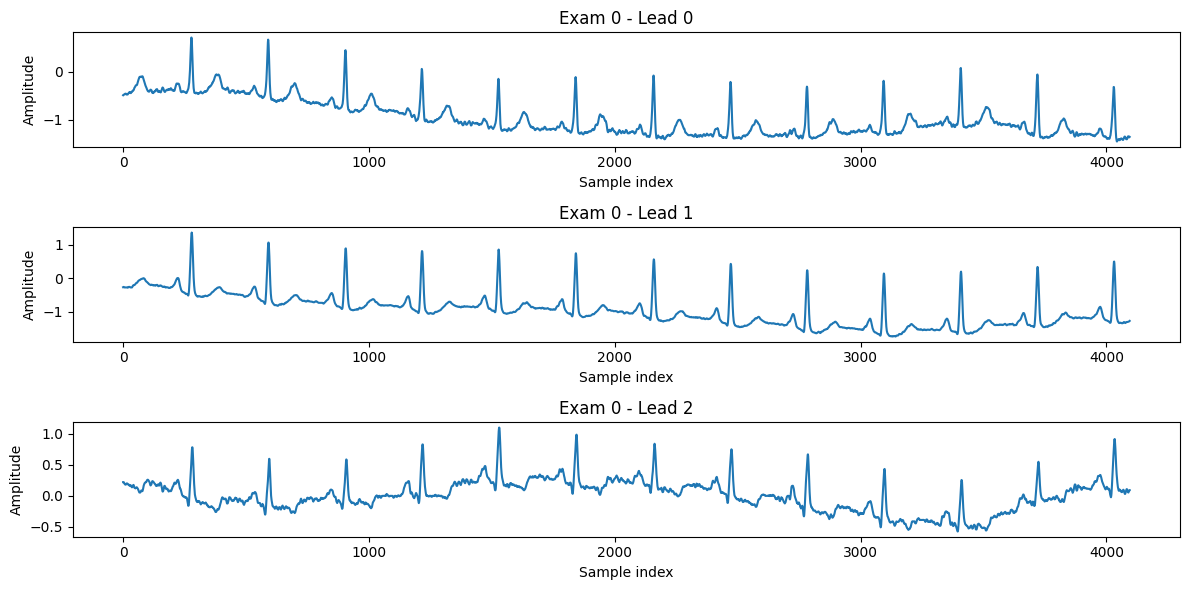

In [5]:
import h5py
import matplotlib.pyplot as plt

# pick a file and one exam index
example_file = h5_files[0]   # from before
exam_idx = 0                 # change this to look at other exams

with h5py.File(example_file, "r") as f:
    tracings = f["tracings"]
    ecg = tracings[exam_idx]        # shape (samples, leads)
    print("ECG shape:", ecg.shape)

samples, leads = ecg.shape
print(f"Samples: {samples}, Leads: {leads}")

# pick some leads to plot, e.g. first 3 leads
lead_indices = [0, 1, 2]  # change if you want other leads

plt.figure(figsize=(12, 6))

for i, lead_idx in enumerate(lead_indices, start=1):
    plt.subplot(len(lead_indices), 1, i)
    plt.plot(ecg[:, lead_idx])
    plt.title(f"Exam {exam_idx} - Lead {lead_idx}")
    plt.xlabel("Sample index")  # if you know fs, you can convert to seconds
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [18]:
!git config --global user.email "astrid_liv@hotmail.com"
!git config --global user.name "LivOlofsson"
# Clone your repository
!git clone https://github.com/Livolofsson/ECG-project.git

# Navigate into the repository
%cd ECG-project

Cloning into 'ECG-project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/ECG-project/ECG-project


In [16]:
!cp "/content/drive/MyDrive/Colab Notebooks/ecg_hdf5_structure.ipynb" /content/ECG-project/

In [20]:
%cd /content
!rm -rf ECG-project

/content


In [21]:
from google.colab import userdata
token = userdata.get('ecg')

!git clone https://{token}@github.com/Livolofsson/ECG-project.git

Cloning into 'ECG-project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [22]:
!cp "/content/drive/MyDrive/Colab Notebooks/ecg_hdf5_structure.ipynb" .

In [23]:
!git add ecg_hdf5_structure.ipynb
!git commit -m "Analyzing HDF5 structure"
!git push origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
